In [807]:
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt

CDC by age

In [808]:
age_sex_data = pd.read_csv("Folder1/Death_Counts_by_Sex_Age_and_State.csv")
age_sex_data.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,All Ages,557486.0,4355577.0,484412.0,272424.0,9083.0,777296.0,NaN
1,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,Under 1 year,66.0,23862.0,257.0,10.0,21.0,334.0,NaN
2,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,0-17 years,277.0,41811.0,703.0,54.0,179.0,1105.0,NaN
3,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,1-4 years,34.0,4286.0,145.0,6.0,61.0,234.0,NaN
4,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,5-14 years,98.0,6930.0,203.0,21.0,76.0,356.0,NaN


In [809]:
age_data = age_sex_data.loc[(age_sex_data['Sex'] == 'All Sexes')]
age_data = age_data.loc[age_data['State'] == 'United States']
age_data = age_data.loc[age_data['Group']== 'By Total']
age_data

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,All Ages,557486.0,4355577.0,484412.0,272424.0,9083.0,777296.0,NaN
1,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,Under 1 year,66.0,23862.0,257.0,10.0,21.0,334.0,NaN
2,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,0-17 years,277.0,41811.0,703.0,54.0,179.0,1105.0,NaN
3,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,1-4 years,34.0,4286.0,145.0,6.0,61.0,234.0,NaN
4,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,5-14 years,98.0,6930.0,203.0,21.0,76.0,356.0,NaN
5,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,15-24 years,844.0,44906.0,974.0,335.0,81.0,1559.0,NaN
6,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,18-29 years,2097.0,79315.0,2286.0,927.0,150.0,3594.0,NaN
7,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,25-34 years,3741.0,92911.0,3676.0,1705.0,237.0,5931.0,NaN
8,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,30-39 years,6089.0,113155.0,5554.0,2799.0,318.0,9140.0,NaN
9,4/28/21,1/1/20,4/24/21,By Total,NaN,NaN,United States,All Sexes,35-44 years,9724.0,133834.0,8638.0,4611.0,358.0,14073.0,NaN


In [810]:
del age_data['Footnote']
del age_data['Data As Of']
del age_data['Sex']
del age_data['Pneumonia Deaths']
del age_data['Pneumonia and COVID-19 Deaths']
del age_data['Influenza Deaths']
del age_data['Pneumonia, Influenza, or COVID-19 Deaths']

In [811]:
age_data = age_data.fillna(0)
#age_data.head()

In [812]:
age_data = age_data.reset_index(drop=True)
age_data

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths
0,1/1/20,4/24/21,By Total,0.0,0.0,United States,All Ages,557486.0,4355577.0
1,1/1/20,4/24/21,By Total,0.0,0.0,United States,Under 1 year,66.0,23862.0
2,1/1/20,4/24/21,By Total,0.0,0.0,United States,0-17 years,277.0,41811.0
3,1/1/20,4/24/21,By Total,0.0,0.0,United States,1-4 years,34.0,4286.0
4,1/1/20,4/24/21,By Total,0.0,0.0,United States,5-14 years,98.0,6930.0
5,1/1/20,4/24/21,By Total,0.0,0.0,United States,15-24 years,844.0,44906.0
6,1/1/20,4/24/21,By Total,0.0,0.0,United States,18-29 years,2097.0,79315.0
7,1/1/20,4/24/21,By Total,0.0,0.0,United States,25-34 years,3741.0,92911.0
8,1/1/20,4/24/21,By Total,0.0,0.0,United States,30-39 years,6089.0,113155.0
9,1/1/20,4/24/21,By Total,0.0,0.0,United States,35-44 years,9724.0,133834.0


In [813]:
age_data.to_csv("Folder2/us-age-data.csv", index=False, header=True)

In [814]:
by_age_data.to_csv("Folder2/age-data.csv", index=False, header=True)

CDC by sex


In [815]:
sex_data = pd.read_csv("Folder1/Death_Counts_by_Sex_Age_and_State.csv")
#sex_data.head()

In [816]:
all_ages = sex_data.loc[sex_data['Age Group'] == 'All Ages']
all_ages = all_ages.loc[all_ages['Group']=='By Total']
sex_state = all_ages.loc[all_ages['State']!='Puerto Rico']
sex_state = sex_state.loc[sex_state['State']!='United States']
sex_state = sex_state.loc[sex_state['State']!='District of Columbia']
sex_data = sex_state.loc[sex_state['Sex'] != 'All Sexes']

In [817]:
del sex_data['Footnote']
del sex_data['Data As Of']
del sex_data['Age Group']
del sex_data['Pneumonia Deaths']
del sex_data['Pneumonia and COVID-19 Deaths']
del sex_data['Influenza Deaths']
del sex_data['Pneumonia, Influenza, or COVID-19 Deaths']
sex_data = sex_data.fillna(0)

In [818]:
sex_data = sex_data.reset_index(drop=True)
sex_data.head()

,Start Date,End Date,Group,Year,Month,State,Sex,COVID-19 Deaths,Total Deaths
0,1/1/20,4/24/21,By Total,0.0,0.0,Alabama,Male,5576.0,43447.0
1,1/1/20,4/24/21,By Total,0.0,0.0,Alabama,Female,4839.0,39660.0
2,1/1/20,4/24/21,By Total,0.0,0.0,Alaska,Male,192.0,3574.0
3,1/1/20,4/24/21,By Total,0.0,0.0,Alaska,Female,132.0,2609.0
4,1/1/20,4/24/21,By Total,0.0,0.0,Arizona,Male,9146.0,56682.0


In [819]:
sex_data.to_csv("Folder2/sex-data.csv", index=False, header=True)

Race Data from CDC

In [820]:
race_ethnicity_data = pd.read_csv("Folder1/race-ethnicity.csv")

In [821]:
del race_ethnicity_data['Footnote']
del race_ethnicity_data['Data as of']

In [822]:
race_ethnicity_data = race_ethnicity_data.loc[(race_ethnicity_data['Group'] == 'By Month')]
race_ethnicity_data = race_ethnicity_data.loc[(race_ethnicity_data['State'] != 'United States')]
race_ethnicity_data = race_ethnicity_data.loc[race_ethnicity_data['State']!='District of Columbia']
race_ethnicity_data = race_ethnicity_data.fillna(0)
#race_ethnicity_data.head()

In [823]:
race_ethnicity_data.rename(columns={"Non-Hispanic White": "White", "Non-Hispanic Black or African American": "Black or African American", "Non-Hispanic American Indian or Alaska Native":
                               "American Indian or Alaska Native", "Non-Hispanic Asian": "Asian", "Non-Hispanic Native Hawaiian or Other Pacific Islander": "Native Hawaiian or Other Pacific Islander",
                               "Deaths_AIAN": "Deaths: AIAN", "Deaths_NHPI": "Deaths: NHPI", "Deaths_Multiracial": "Deaths: Multiracial",
                               "Non Hispanic more than one race": "More Than One Race"})
race_ethnicity_data.head(2)

,Start Date,End Date,Year,Month,Group,State,Indicator,Non-Hispanic White,Non-Hispanic Black or African American,Non-Hispanic American Indian or Alaska Native,Non-Hispanic Asian,Non-Hispanic Native Hawaiian or Other Pacific Islander,Non Hispanic more than one race,Hispanic or Latino
88,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Count of COVID-19 deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,01/01/2020,01/31/2020,2020,1.0,By Month,Alabama,Distribution of COVID-19 deaths (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [824]:
race_ethnicity_data = race_ethnicity_data.reset_index(drop=True)

In [825]:
race_ethnicity_data.to_csv("Folder2/race-population-data.csv", index=False, header=True)

trying to merge

In [826]:
race_data = pd.read_csv("Folder2/race-population-data.csv")
#race_data.head()

In [827]:
age_data = pd.read_csv("Folder2/us-age-data.csv")
age_data.head()

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths
0,1/1/20,4/24/21,By Total,0.0,0.0,United States,All Ages,557486.0,4355577.0
1,1/1/20,4/24/21,By Total,0.0,0.0,United States,Under 1 year,66.0,23862.0
2,1/1/20,4/24/21,By Total,0.0,0.0,United States,0-17 years,277.0,41811.0
3,1/1/20,4/24/21,By Total,0.0,0.0,United States,1-4 years,34.0,4286.0
4,1/1/20,4/24/21,By Total,0.0,0.0,United States,5-14 years,98.0,6930.0


In [828]:
age_data = age_data.loc[age_data['Age Group'] != "18-29 years"]
age_data = age_data.loc[age_data['Age Group'] != "0-17 years"]
age_data = age_data.loc[age_data['Age Group'] != "Under 1 year"]
age_data = age_data.loc[age_data['Age Group'] != "30-39 years"]
age_data = age_data.loc[age_data['Age Group'] != "40-49 years"]
age_data = age_data.loc[age_data['Age Group'] != "50-64 years"]

In [829]:
age_data['Age Group'] = age_data['Age Group'].replace(
    {'1-4 years': 'Under 5 years'})

In [830]:
age_data

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths
0,1/1/20,4/24/21,By Total,0.0,0.0,United States,All Ages,557486.0,4355577.0
3,1/1/20,4/24/21,By Total,0.0,0.0,United States,Under 5 years,34.0,4286.0
4,1/1/20,4/24/21,By Total,0.0,0.0,United States,5-14 years,98.0,6930.0
5,1/1/20,4/24/21,By Total,0.0,0.0,United States,15-24 years,844.0,44906.0
7,1/1/20,4/24/21,By Total,0.0,0.0,United States,25-34 years,3741.0,92911.0
9,1/1/20,4/24/21,By Total,0.0,0.0,United States,35-44 years,9724.0,133834.0
11,1/1/20,4/24/21,By Total,0.0,0.0,United States,45-54 years,27144.0,245719.0
13,1/1/20,4/24/21,By Total,0.0,0.0,United States,55-64 years,68769.0,568214.0
14,1/1/20,4/24/21,By Total,0.0,0.0,United States,65-74 years,123309.0,876720.0
15,1/1/20,4/24/21,By Total,0.0,0.0,United States,75-84 years,154212.0,1062915.0


In [831]:
pop_data = pd.read_csv("Folder2/Population_byCDCAgeGroup_byState.csv")

In [832]:
pop_data = pop_data.rename(columns={"CDC_AgeGroups":"Age Group"})
#pop_data

In [833]:
pop_list = []
pop_list.append(total_pop)
pop_list.append(under_pop)
pop_list.append(years_5_14_sum)
pop_list.append(years_15_24_sum)
pop_list.append(years_25_34_sum)
pop_list.append(years_35_44_sum)
pop_list.append(years_45_54_sum)
pop_list.append(years_55_64_sum)
pop_list.append(years_65_74_sum)
pop_list.append(years_75_84_sum)
pop_list.append(years_85_sum)
#pop_list

In [834]:
total_data= pop_data.loc[pop_data['Age Group']=='Total']
total_pop = total_data['Population'].sum()
under_data= pop_data.loc[pop_data['Age Group']=='Under 5 years']
under_pop = under_data['Population'].sum()
years_5_14 = pop_data.loc[pop_data['Age Group']=='5-14 years']
years_5_14_sum = years_5_14['Population'].sum()
years_15_24 = pop_data.loc[pop_data['Age Group']=='15-24 years']
years_15_24_sum = years_15_24['Population'].sum()
years_25_34 = pop_data.loc[pop_data['Age Group']=='25-34 years']
years_25_34_sum = years_25_34['Population'].sum()
years_35_44 = pop_data.loc[pop_data['Age Group']=='35-44 years']
years_35_44_sum = years_35_44['Population'].sum()
years_45_54 = pop_data.loc[pop_data['Age Group']=='45-54 years']
years_45_54_sum = years_45_54['Population'].sum()
years_55_64 = pop_data.loc[pop_data['Age Group']=='55-64 years']
years_55_64_sum = years_55_64['Population'].sum()
years_65_74 = pop_data.loc[pop_data['Age Group']=='65-74 years']
years_65_74_sum = years_65_74['Population'].sum()
years_75_84 = pop_data.loc[pop_data['Age Group']=='75-84 years']
years_75_84_sum = years_75_84['Population'].sum()
years_85 = pop_data.loc[pop_data['Age Group']=='85 years and over']
years_85_sum = years_85['Population'].sum()

In [835]:
age_data["Population by Age Group"] = pop_list
age_data

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths,Population by Age Group
0,1/1/20,4/24/21,By Total,0.0,0.0,United States,All Ages,557486.0,4355577.0,327533774.0
3,1/1/20,4/24/21,By Total,0.0,0.0,United States,Under 5 years,34.0,4286.0,19531315.0
4,1/1/20,4/24/21,By Total,0.0,0.0,United States,5-14 years,98.0,6930.0,40926765.0
5,1/1/20,4/24/21,By Total,0.0,0.0,United States,15-24 years,844.0,44906.0,42599542.0
7,1/1/20,4/24/21,By Total,0.0,0.0,United States,25-34 years,3741.0,92911.0,45775780.0
9,1/1/20,4/24/21,By Total,0.0,0.0,United States,35-44 years,9724.0,133834.0,41550175.0
11,1/1/20,4/24/21,By Total,0.0,0.0,United States,45-54 years,27144.0,245719.0,40800616.0
13,1/1/20,4/24/21,By Total,0.0,0.0,United States,55-64 years,68769.0,568214.0,42378661.0
14,1/1/20,4/24/21,By Total,0.0,0.0,United States,65-74 years,123309.0,876720.0,31433214.0
15,1/1/20,4/24/21,By Total,0.0,0.0,United States,75-84 years,154212.0,1062915.0,15944990.0


In [836]:
death_rate = age_data['COVID-19 Deaths']/age_data['Population by Age Group'] * 100

In [837]:
age_data["COVID-19 Death Rate"] = death_rate
age_data

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths,Population by Age Group,COVID-19 Death Rate
0,1/1/20,4/24/21,By Total,0.0,0.0,United States,All Ages,557486.0,4355577.0,327533774.0,0.170207
3,1/1/20,4/24/21,By Total,0.0,0.0,United States,Under 5 years,34.0,4286.0,19531315.0,0.000174
4,1/1/20,4/24/21,By Total,0.0,0.0,United States,5-14 years,98.0,6930.0,40926765.0,0.000239
5,1/1/20,4/24/21,By Total,0.0,0.0,United States,15-24 years,844.0,44906.0,42599542.0,0.001981
7,1/1/20,4/24/21,By Total,0.0,0.0,United States,25-34 years,3741.0,92911.0,45775780.0,0.008172
9,1/1/20,4/24/21,By Total,0.0,0.0,United States,35-44 years,9724.0,133834.0,41550175.0,0.023403
11,1/1/20,4/24/21,By Total,0.0,0.0,United States,45-54 years,27144.0,245719.0,40800616.0,0.066528
13,1/1/20,4/24/21,By Total,0.0,0.0,United States,55-64 years,68769.0,568214.0,42378661.0,0.162273
14,1/1/20,4/24/21,By Total,0.0,0.0,United States,65-74 years,123309.0,876720.0,31433214.0,0.392289
15,1/1/20,4/24/21,By Total,0.0,0.0,United States,75-84 years,154212.0,1062915.0,15944990.0,0.967150


In [838]:
population_perc = (age_data['Population by Age Group']/327533774.0)*100
#population_perc

In [839]:
age_data["Population %"] = population_perc
age_data

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths,Population by Age Group,COVID-19 Death Rate,Population %
0,1/1/20,4/24/21,By Total,0.0,0.0,United States,All Ages,557486.0,4355577.0,327533774.0,0.170207,100.000000
3,1/1/20,4/24/21,By Total,0.0,0.0,United States,Under 5 years,34.0,4286.0,19531315.0,0.000174,5.963145
4,1/1/20,4/24/21,By Total,0.0,0.0,United States,5-14 years,98.0,6930.0,40926765.0,0.000239,12.495434
5,1/1/20,4/24/21,By Total,0.0,0.0,United States,15-24 years,844.0,44906.0,42599542.0,0.001981,13.006152
7,1/1/20,4/24/21,By Total,0.0,0.0,United States,25-34 years,3741.0,92911.0,45775780.0,0.008172,13.975896
9,1/1/20,4/24/21,By Total,0.0,0.0,United States,35-44 years,9724.0,133834.0,41550175.0,0.023403,12.685768
11,1/1/20,4/24/21,By Total,0.0,0.0,United States,45-54 years,27144.0,245719.0,40800616.0,0.066528,12.456919
13,1/1/20,4/24/21,By Total,0.0,0.0,United States,55-64 years,68769.0,568214.0,42378661.0,0.162273,12.938715
14,1/1/20,4/24/21,By Total,0.0,0.0,United States,65-74 years,123309.0,876720.0,31433214.0,0.392289,9.596938
15,1/1/20,4/24/21,By Total,0.0,0.0,United States,75-84 years,154212.0,1062915.0,15944990.0,0.967150,4.868197


In [840]:
covid_death_rate = (age_data['COVID-19 Deaths']/557486.0)*100
age_data["COVID-19 Death Rate by Age"] = covid_death_rate
age_data

,Start Date,End Date,Group,Year,Month,State,Age Group,COVID-19 Deaths,Total Deaths,Population by Age Group,COVID-19 Death Rate,Population %,COVID-19 Death Rate by Age
0,1/1/20,4/24/21,By Total,0.0,0.0,United States,All Ages,557486.0,4355577.0,327533774.0,0.170207,100.000000,100.000000
3,1/1/20,4/24/21,By Total,0.0,0.0,United States,Under 5 years,34.0,4286.0,19531315.0,0.000174,5.963145,0.006099
4,1/1/20,4/24/21,By Total,0.0,0.0,United States,5-14 years,98.0,6930.0,40926765.0,0.000239,12.495434,0.017579
5,1/1/20,4/24/21,By Total,0.0,0.0,United States,15-24 years,844.0,44906.0,42599542.0,0.001981,13.006152,0.151394
7,1/1/20,4/24/21,By Total,0.0,0.0,United States,25-34 years,3741.0,92911.0,45775780.0,0.008172,13.975896,0.671048
9,1/1/20,4/24/21,By Total,0.0,0.0,United States,35-44 years,9724.0,133834.0,41550175.0,0.023403,12.685768,1.744259
11,1/1/20,4/24/21,By Total,0.0,0.0,United States,45-54 years,27144.0,245719.0,40800616.0,0.066528,12.456919,4.869001
13,1/1/20,4/24/21,By Total,0.0,0.0,United States,55-64 years,68769.0,568214.0,42378661.0,0.162273,12.938715,12.335556
14,1/1/20,4/24/21,By Total,0.0,0.0,United States,65-74 years,123309.0,876720.0,31433214.0,0.392289,9.596938,22.118762
15,1/1/20,4/24/21,By Total,0.0,0.0,United States,75-84 years,154212.0,1062915.0,15944990.0,0.967150,4.868197,27.662040


In [841]:
del age_data['Year']
del age_data['Month']
age_data

,Start Date,End Date,Group,State,Age Group,COVID-19 Deaths,Total Deaths,Population by Age Group,COVID-19 Death Rate,Population %,COVID-19 Death Rate by Age
0,1/1/20,4/24/21,By Total,United States,All Ages,557486.0,4355577.0,327533774.0,0.170207,100.000000,100.000000
3,1/1/20,4/24/21,By Total,United States,Under 5 years,34.0,4286.0,19531315.0,0.000174,5.963145,0.006099
4,1/1/20,4/24/21,By Total,United States,5-14 years,98.0,6930.0,40926765.0,0.000239,12.495434,0.017579
5,1/1/20,4/24/21,By Total,United States,15-24 years,844.0,44906.0,42599542.0,0.001981,13.006152,0.151394
7,1/1/20,4/24/21,By Total,United States,25-34 years,3741.0,92911.0,45775780.0,0.008172,13.975896,0.671048
9,1/1/20,4/24/21,By Total,United States,35-44 years,9724.0,133834.0,41550175.0,0.023403,12.685768,1.744259
11,1/1/20,4/24/21,By Total,United States,45-54 years,27144.0,245719.0,40800616.0,0.066528,12.456919,4.869001
13,1/1/20,4/24/21,By Total,United States,55-64 years,68769.0,568214.0,42378661.0,0.162273,12.938715,12.335556
14,1/1/20,4/24/21,By Total,United States,65-74 years,123309.0,876720.0,31433214.0,0.392289,9.596938,22.118762
15,1/1/20,4/24/21,By Total,United States,75-84 years,154212.0,1062915.0,15944990.0,0.967150,4.868197,27.662040


In [890]:
age_data.to_csv("Folder2/final-age-data.csv", index=False, header=True)

In [842]:
age_data = age_data.loc[age_data['Age Group']!='All Ages']

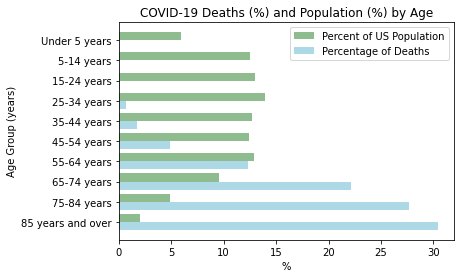

In [889]:
x_axis = []
x_axis = age_data['Age Group'].tolist()
ind = np.arange(len(x_axis))
width = 0.4

death_axis = age_data['COVID-19 Death Rate by Age'].astype(float)
pop_axis = age_data['Population %'].astype(float)
fig, ax = plt.subplots()

ax.barh(ind-width, pop_axis, width, label ='Percent of US Population', color='darkseagreen', align='center')
ax.barh(ind, death_axis, width, color='lightblue', label='Percentage of Deaths', align='center')


ax.set_yticks(ind-.2)
ax.legend()
ax.set_xlabel('%')
ax.set_ylabel('Age Group (years)')
ax.set_yticklabels(x_axis)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_title('COVID-19 Deaths (%) and Population (%) by Age')
plt.show()